In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Question 1: 

Shopify Order Analysis

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Answers:

a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

There could be an outlier in this dataset. 
As `order_amount` = `total_items` x `price_per_item`
Outliers could come from extrodinary large `total_items` or `price_per_item`, so I would check the distributions of data from these two columns respectively.

I would remove outliers that distort the summary statistics, and check the summary statistics of the `order_amount` again.


b) What metric would you report for this dataset?

I would report Median Order Value (MOV) that is more resilient to outliers. 


c) What is its value?

The MOV is \$ 284 for this dataset.


In [2]:
# load the dataset
df = pd.read_csv('data/2019 Winter Data Science Intern Challenge Data Set.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
# Check AOV and MOV
print('Average Order Value (AOV):', df['order_amount'].mean())
print('Median Order Value MOV):',df['order_amount'].median())

Average Order Value (AOV): 3145.128
Median Order Value MOV): 284.0


We immediately notice that the standard deviation of the `order_amount` is large. While the AOV is large for a sneaker store, the median order value is more aligned with the reality. 

Let's check the summary statistics of `total_items` and `price_per_item`

In [5]:
df['price_per_item'] = df['order_amount'] / df['total_items']

In [6]:
df[['order_amount', 'total_items', 'price_per_item']].describe()

,order_amount,total_items,price_per_item
count,5000.000000,5000.00000,5000.000000
mean,3145.128000,8.78720,387.742800
std,41282.539349,116.32032,2441.963725
min,90.000000,1.00000,90.000000
25%,163.000000,1.00000,133.000000
50%,284.000000,2.00000,153.000000
75%,390.000000,3.00000,169.000000
max,704000.000000,2000.00000,25725.000000


Note here that the Max value for both the `total_items` and `price_per_item` are huge. Potentially, we could have outliers in both columns. 

First, check the distribution of `total_items`

<AxesSubplot:xlabel='total_items', ylabel='count'>

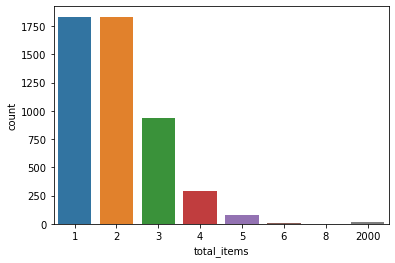

In [7]:
sns.countplot(x='total_items', data=df)

In [8]:
df['total_items'].value_counts().sort_index()

1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
Name: total_items, dtype: int64

Let's investigate the summary stats for orders with `total_items` in two groups: small order-size group and large order-size group

In [9]:
# small order size group

small_order_group = df[df['total_items'] <8] 

small_order_group[['order_amount', 'total_items', 'price_per_item']].describe()

,order_amount,total_items,price_per_item
count,4982.000000,4982.000000,4982.000000
mean,754.029707,1.992774,387.915897
std,5314.623888,0.979589,2446.368488
min,90.000000,1.000000,90.000000
25%,163.000000,1.000000,133.000000
50%,284.000000,2.000000,153.000000
75%,390.000000,3.000000,168.000000
max,154350.000000,6.000000,25725.000000


In [10]:
# large order size group

large_order_group = df[df['total_items'] >8]

large_order_group[['order_amount', 'total_items', 'price_per_item']].describe()

,order_amount,total_items,price_per_item
count,17.0,17.0,17.0
mean,704000.0,2000.0,352.0
std,0.0,0.0,0.0
min,704000.0,2000.0,352.0
25%,704000.0,2000.0,352.0
50%,704000.0,2000.0,352.0
75%,704000.0,2000.0,352.0
max,704000.0,2000.0,352.0


In [11]:
large_order_group

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


In the large order-size group, although the order amount is large, the `price_per_item` is reasonable for a sneaker store. 

However, in the small order-size group, the maximum `price_per_item` is \$25725, which should be an outlier



In [12]:
# Check the quantile

df['price_per_item'].quantile([.1, .5, 0.75, 0.9, 0.99])

0.10    118.0
0.50    153.0
0.75    169.0
0.90    181.0
0.99    352.0
Name: price_per_item, dtype: float64

There should be some outliers with massive `price_per_item`

In [13]:
outlier_orders = df[df['price_per_item'] > 352]

In [14]:
outlier_orders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


Clearly, all the outliers are from one sotre, where `shop_id` = 78

In [15]:
# check other orders from this shop
df[df['shop_id'] == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


In [16]:
print('number of orders from shop 78: ', len(df[df['shop_id'] == 78]))

print('number of total outlier orders: ', len(outlier_orders))

number of orders from shop 78:  46
number of total outlier orders:  46


So, all the outlier orders are from one store. We should remove this order from the dataset.

In [17]:
df_clean = df[df['shop_id'] != 78]
df_clean.shape

(4954, 8)

In [18]:
# check the summary statistics again

df_clean[['order_amount', 'total_items', 'price_per_item']].describe()

,order_amount,total_items,price_per_item
count,4954.000000,4954.000000,4954.000000
mean,2717.367784,8.851029,152.475575
std,41155.996469,116.857286,31.260218
min,90.000000,1.000000,90.000000
25%,163.000000,1.000000,132.000000
50%,284.000000,2.000000,153.000000
75%,390.000000,3.000000,168.000000
max,704000.000000,2000.000000,352.000000


The AOV from cleaned data is still large (\$2717), because we have the orders fromt he large order-size group, which are valid.

The better metric to report here should be MOV (\$284)

## Question 2: 

SQL Questions

a) How many orders were shipped by Speedy Express in total?


```
SELECT COUNT(*) 
FROM ORDERS 
WHERE ShipperID = 
(SELECT ShipperID FROM Shippers
WHERE ShipperName = 'Speedy Express')
```

The answer is: 54

b) What is the last name of the employee with the most orders?

```
SELECT LastName FROM Employees
WHERE Employees.EmployeeID = 
(SELECT EmployeeID
FROM Orders 
GROUP BY EmployeeID 
ORDER BY COUNT(OrderID) DESC
LIMIT 1)
```

The answer is: Peacock

c)What product was ordered the most by customers in Germany?


```
SELECT ProductName FROM Products
WHERE ProductID IN
(SELECT ProductID FROM
(SELECT ProductID, SUM(Quantity) From OrderDetails WHERE 
OrderID IN
(SELECT OrderID FROM Orders
WHERE CustomerID IN (SELECT CustomerID FROM Customers
WHERE Country = 'Germany'))
GROUP BY ProductID
ORDER BY SUM(Quantity) Desc
LIMIT 1))
```

The answer is: Boston Crab Meat